In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt

print(tf.keras.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

2023-06-14 15:11:24.354021: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 15:11:25.245605: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0
Num GPUs Available:  1


2023-06-14 15:11:26.383401: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-14 15:11:26.458011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-14 15:11:26.458221: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

#### Load dataset:

In [2]:
(x_train_raw, y_train), (x_test_raw, y_test) = keras.datasets.mnist.load_data()

#### Scale the dataset (from the range [0,255] to the range [0,1]):

(-0.5, 27.5, 27.5, -0.5)

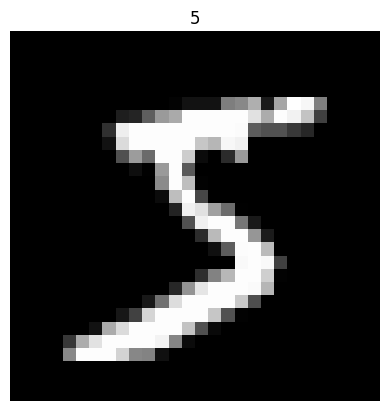

In [3]:
x_train_scaled = x_train_raw / 255
x_test_scaled = x_test_raw / 255

plt.imshow(x_train_scaled[0], cmap="gray")
plt.title(y_train[0])
plt.axis("off")

#### Reshape the dataset by adding a color channel (gray) for each image:

(-0.5, 27.5, 27.5, -0.5)

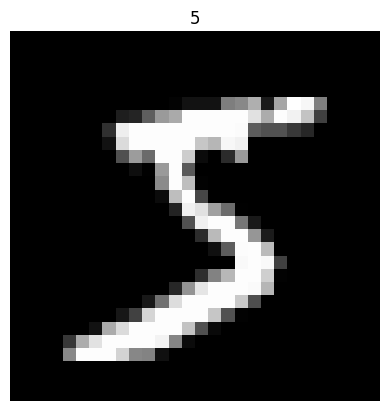

In [4]:
x_train = x_train_scaled.reshape(-1, 28, 28, 1)
x_test = x_test_scaled.reshape(-1, 28, 28, 1)

plt.imshow(x_train[0], cmap="gray")
plt.title(y_train[0])
plt.axis("off")

#### Create the CNN, one input layer, two hidden layers, one output layer:
Use ReLU as activation function for each layer and add a softmax layer at the end to have a probability density at the output.

In [5]:
cnn = models.Sequential(
    [
        # input layer
        layers.Conv2D(
            filters=25, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)
        ),
        layers.MaxPooling2D((2, 2)),
        # Two hidden layers
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        # output layer
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

2023-06-14 15:11:27.064975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-14 15:11:27.065267: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-14 15:11:27.065453: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

#### Train the CNN with the data:

In [6]:
cnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
cnn.fit(x_train, y_train, epochs=10, verbose=2)

2023-06-14 15:11:28.079961: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-06-14 15:11:28.348262: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10


2023-06-14 15:11:29.808189: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-14 15:11:30.474484: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fec41997050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-14 15:11:30.474515: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-06-14 15:11:30.478819: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-14 15:11:30.624483: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 - 9s - loss: 0.2314 - accuracy: 0.9261 - 9s/epoch - 5ms/step
Epoch 2/10
1875/1875 - 6s - loss: 0.0774 - accuracy: 0.9768 - 6s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 6s - loss: 0.0589 - accuracy: 0.9819 - 6s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 6s - loss: 0.0453 - accuracy: 0.9859 - 6s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 6s - loss: 0.0374 - accuracy: 0.9882 - 6s/epoch - 3ms/step
Epoch 6/10
1875/1875 - 6s - loss: 0.0303 - accuracy: 0.9903 - 6s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 6s - loss: 0.0247 - accuracy: 0.9919 - 6s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 6s - loss: 0.0210 - accuracy: 0.9931 - 6s/epoch - 3ms/step
Epoch 9/10
1875/1875 - 6s - loss: 0.0171 - accuracy: 0.9944 - 6s/epoch - 3ms/step
Epoch 10/10
1875/1875 - 6s - loss: 0.0159 - accuracy: 0.9947 - 6s/epoch - 3ms/step


#### Test the CNN:

In [7]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0605 - accuracy: 0.9859


[0.06054627522826195, 0.9858999848365784]

#### Export the model

In [8]:
# cnn.save(filepath="handwriting_cnn.h5", save_format="h5")